<a href="https://colab.research.google.com/github/jehee-lee/jjtech/blob/main/mnist_model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from torch import cuda

device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training MNIST Model on {device}\n{"=" * 44}')

Training MNIST Model on cuda


==============================데이터를 불러온 뒤 학습하기==============================

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
train_dset = dsets.MNIST(root='/content/drive/MyDrive/opencvRo',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
test_dset = dsets.MNIST(root='/content/drive/MyDrive/opencvRo',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

In [ ]:
batch_size =64

train_loader = DataLoader(dataset=train_dset,
                                           batch_size=batch_size,
                                           shuffle=True, drop_last=True)

test_loader = DataLoader(dataset=test_dset,
                                          batch_size=batch_size,
                                          shuffle=False, drop_last=True)

In [ ]:
t_x = train_dset[0][0].size()

t_conv = nn.Conv2d(1,10, kernel_size=5)
t_mp = nn.MaxPool2d(2)



In [ ]:
from torch import nn, optim
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
import matplotlib.pyplot as plt

loss_list=[]
acc_list = []

In [ ]:
def train(epoch):
  model.train()
  for batch_idx, (X,Y) in enumerate(train_loader):
    X, Y = X.to(device), Y.to(device)
    optimizer.zero_grad()
    output=model(X)
    loss = criterion(output, Y)
    loss_list.append(loss.item())#loss 수집
    loss.backward()
    optimizer.step()
    if batch_idx %10==0:
      print('Train Epoch: {} | Batch Status : {}/{}({:.0f}%) | Loss: {:.6f}'
      .format(epoch, batch_idx*len(X), len(train_loader.dataset),
              100.*batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
  model.eval()
  test_loss = 0
  correct = 0
  for X, Y in test_loader:
    X, Y = X.to(device), Y.to(device)
    output = model(X)
    test_loss += criterion(output, Y).item()
    pred = output.data.max(1,keepdim=True)[1]
    correct += pred.eq(Y.data.view_as(pred)).cpu().sum()
    test_loss /= len(test_loader.dataset)
    Accuracy = 100. * correct / len(test_loader.dataset)
    acc_list.append(Accuracy.item())#Accuracy 수집
    print(f'===========================\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} '
          f'({Accuracy:.0f}%)')

In [ ]:
import time

if __name__ == '__main__':
    since = time.time()
    for epoch in range(1, 10):
        epoch_start = time.time()
        train(epoch)
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Training time: {m:.0f}m {s:.0f}s')
        test()
        m, s = divmod(time.time() - epoch_start, 60)
        print(f'Testing time: {m:.0f}m {s:.0f}s')

    m, s = divmod(time.time() - since, 60)
    print(f'Total Time: {m:.0f}m {s:.0f}s\nModel was trained on {device}!')

==============================학습된 parameter 분석==============================




In [ ]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

print()

# 옵티마이저의 state_dict 출력
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([10, 1, 5, 5])
conv1.bias 	 torch.Size([10])
conv2.weight 	 torch.Size([20, 10, 5, 5])
conv2.bias 	 torch.Size([20])
fc.weight 	 torch.Size([10, 320])
fc.bias 	 torch.Size([10])

Optimizer's state_dict:
state 	 {0: {'momentum_buffer': tensor([[[[ 1.6644e-04, -1.2489e-03, -2.5720e-03, -3.8727e-03, -3.2855e-03],
          [-1.1334e-03, -2.9955e-03, -5.6065e-03, -5.2716e-03, -4.4391e-03],
          [-3.0075e-03, -6.4633e-03, -7.7417e-03, -7.5855e-03, -8.1067e-03],
          [-2.9677e-03, -5.0089e-03, -6.9988e-03, -5.5311e-03, -7.1121e-03],
          [-1.8606e-03, -5.1289e-03, -6.9612e-03, -4.1751e-03, -5.5894e-03]]],


        [[[-2.6867e-04, -5.3973e-03, -9.6400e-03, -1.1925e-02, -9.1738e-03],
          [-2.4222e-03, -1.0534e-02, -1.3135e-02, -1.2220e-02, -7.2111e-03],
          [-9.2218e-03, -1.4217e-02, -1.5059e-02, -1.1888e-02, -6.5618e-03],
          [-1.3067e-02, -1.6454e-02, -1.4895e-02, -1.1641e-02, -1.1474e-02],
          [-1.7456e-02

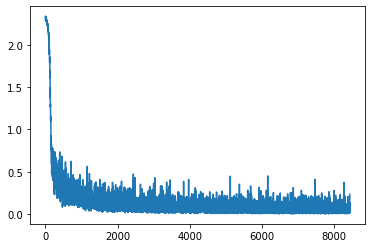

In [ ]:
plt.plot(loss_list)

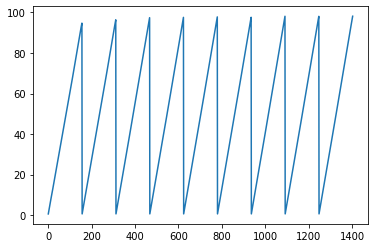

In [ ]:
plt.plot(acc_list)

==============================모델 테스트==============================


모델 테스트 1) 최종 accuracy 구하기 (CNN.ver)

https://truman.tistory.com/216

In [113]:
correct = 0

total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    images, labels = images.to(device),labels.to(device)
    outputs = model(images)
    _,prediction = torch.max(outputs.data,1)
    total+=labels.size(0)
    correct += (prediction==labels).sum().item()

print("Acc:", 100*correct/total)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Acc: 98.34735576923077


모델 테스트 2) 분류모델을 활용해 임의의 데이터 분류하기




***중요!!!!

http://taewan.kim/post/cnn/

CNN은 4텐서를 input으로 받기 때문에 view(1,1,28,28)으로 변환해야 함 <==> LNN과 차이

Label: 8
Prediction: 8


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


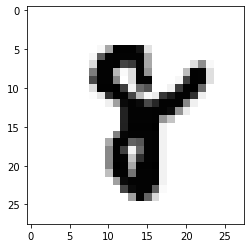

In [ ]:
import random
r = random.randint(0, len(test_dset)-1) #숫자 r은 test데이터셋의 크기만큼의 숫자중 하나
X_val = test_dset.test_data[r:r+1].view(1,1,28,28).float().to(device) #***중요 CNN은 4텐서이기 때문에 4텐서로 변환
Y_val = test_dset.test_labels[r:r+1].to(device)

print('Label:', Y_val.item())
single_prediction = model(X_val)
print('Prediction:', torch.argmax(single_prediction,1).item())

plt.imshow(test_dset.test_data[r:r+1].view(28,28), cmap='Greys')
plt.show()

==============================추론하기==============================

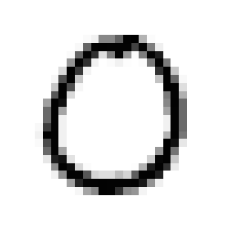

In [ ]:
import cv2
 

img = cv2.imread('/content/drive/MyDrive/opencvRo/number/0.png')

plt.imshow(img)
plt.axis('off')
plt.show()

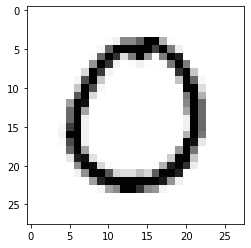

In [ ]:
img_resize = cv2.resize(img, (28,28))

plt.imshow(img_resize)
plt.show()

shape of img1: (28, 28, 3)


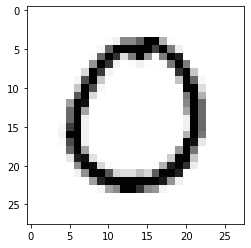

shape of img2: (28, 28)


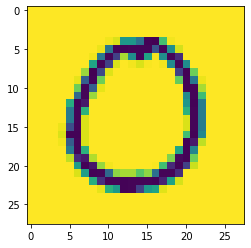

shape of img3: (28, 28)


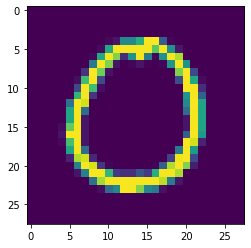

shape of img4: torch.Size([28, 28])


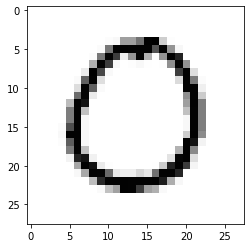

In [ ]:
import numpy as np

#28*28로 리사이즈
img1 = cv2.resize(img, (28,28))

print("shape of img1:", img1.shape)
plt.imshow(img1)
plt.show()

#그레이스케일로 변환
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

print("shape of img2:", img2.shape)

plt.imshow(img2)
plt.show()

#출력된 색상이 학습된 이미지의 색상과 반전되어있으므로 반전 실행
img3 = ~img2

print("shape of img3:", img3.shape)

plt.imshow(img3)
plt.show()

#파이토치 명령어를 통해 이미지(openCV의 경우 numpy형)를 텐서형으로 변환 후 그레이스케일로 출력
img_fin = torch.from_numpy(img3)

print("shape of img4:", img_fin.shape)

plt.imshow(img_fin.view(28,28),cmap='Greys')
plt.show()

Prediction: 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


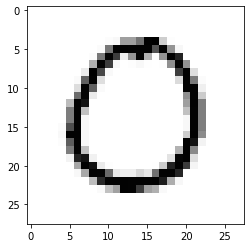

In [ ]:
result = img_fin.view(1,1,28,28).float().to(device)

single_prediction = model(result)
print('Prediction:', torch.argmax(single_prediction,1).item())

plt.imshow(img_fin.view(28,28))
plt.imshow(img_fin.view(28,28),cmap='Greys')
plt.show()

모델 저장하기

In [ ]:
PATH = '/content/drive/MyDrive/opencvRo/'

torch.save(model.state_dict(), PATH +'model_for_RO_CNN.pt')
torch.save(optimizer.state_dict(),PATH +'optimizer_for_RO_CNN.pt')

저장된 모델 또한 라즈베리파이에서 테스트 할 예정